In [2]:
import pandas as pd
import numpy as np
import sys
import os
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# 将当前工作目录添加到 Python 路径
# 获取当前工作目录
current_working_dir = os.getcwd()

# 将根目录添加到 sys.path
sys.path.append(os.path.abspath(os.path.join(current_working_dir, '../..')))

from function import metrics_to_dataframe, plot_actual_vs_predicted

In [3]:
# 读取数据
df = pd.read_csv('../../data/dataset.csv')

# 对指定列进行独热编码
columns_to_encode = ['CM_type', 'CM_morph', 'MS2_morph', 'CP_morph', 'Cation', 'Anion']
df_encoded = pd.get_dummies(df, columns=columns_to_encode)

# 对目标值进行对数变换
df_encoded['Cs_log'] = df_encoded['Cs'].apply(lambda x: np.log(x))

X = df_encoded.drop(['Cs','Cs_log'], axis=1)
y = df_encoded['Cs_log']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=6
)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


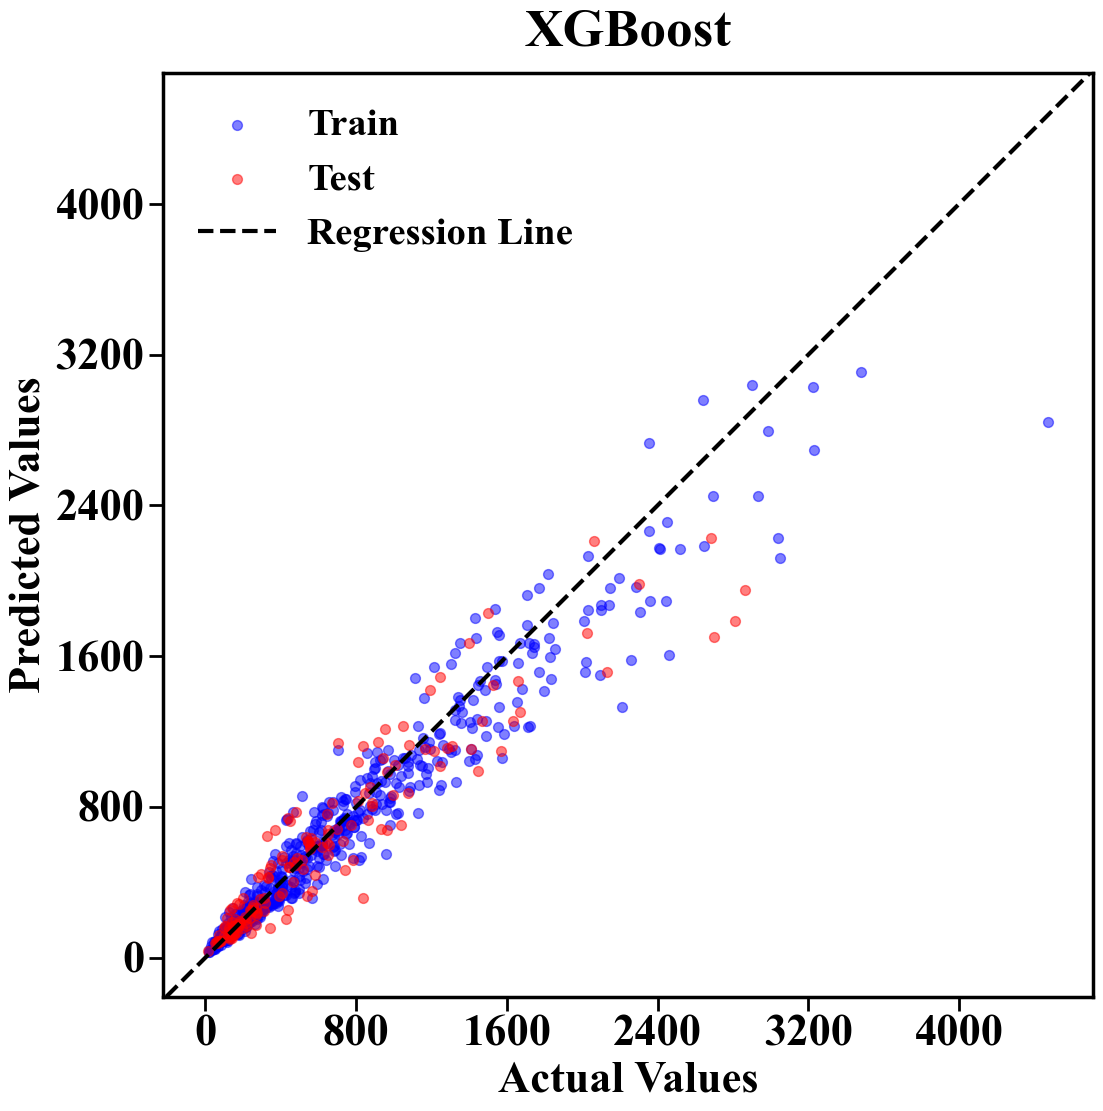

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,XGBoost,0.934681,94.851652,17.053921,168.330403,0.866766,131.528924,23.823866,214.882272


In [4]:
# 模型训练
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    subsample=0.6,
    gamma=0.3,
    # max_depth=18,
    # min_child_weight=9,
    # reg_alpha=0.5,
    # colsample_bytree=0.8,
    # colsample_bylevel=0.6,
    # colsample_bynode=0.6,
)
model.fit(X_train, y_train)

# 预测
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# # 将预测值转换为原始值
y_train_pred = np.exp(y_train_pred)
y_test_pred = np.exp(y_test_pred)
y_train = np.exp(y_train)
y_test = np.exp(y_test)

xgb_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'XGBoost')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'XGBoost', figpath='xgb_actual_vs_predicted.png')
xgb_metrics